In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#读取文件并按时间顺序重新排序
data=pd.read_excel('/Users/zhongrunping/Desktop/jupyter文件夹/数学建模/253个样本(已经预处理过).xlsx'
                  ,na_values='Nan')[::-1].iloc[:,2:]
data.columns=data.iloc[-1,:]
data=data[:-1].reset_index(drop=True)

In [3]:
data=data.iloc[:,1:]

In [4]:
#查看缺失值
data.isnull().sum()[data.isnull().sum()>0]

0
S-ZORB.AT_5201.PV        1
S-ZORB.SIS_LT_1001.PV    2
S-ZORB.AI_2903.PV        2
S-ZORB.FT_1202.TOTAL     2
S-ZORB.FT_1204.TOTAL     2
dtype: int64

In [5]:
#缺失值 向前填充
data=data.fillna(method='ffill')
data.isnull().sum()[data.isnull().sum()>0]  #没有缺失值

Series([], dtype: int64)

In [6]:
interval=pd.read_excel('/Users/zhongrunping/Desktop/jupyter文件夹/数学建模/各变量的最大最小值.xlsx')
interval.head()

,位号,最小值,最大值
0,S-ZORB.CAL_H2.PV,0.20,0.37
1,S-ZORB.PDI_2102.PV,10.00,35.00
2,S-ZORB.PT_2801.PV,2.35,2.70
3,S-ZORB.FC_2801.PV,600.00,1000.00
4,S-ZORB.TE_2103.PV,410.00,435.00


In [7]:
#获取变量的取值范围
def get_column_range(column):
    index=interval['位号'][interval['位号']==column].index[0]
    maximum=interval['最大值'][index]
    minimum=interval['最小值'][index]
    return minimum,maximum  #返回最大最小值

In [8]:
  #将超出范围的值设置为空
for column in data.columns[13:]:
    a,b=get_column_range(column)
    data[column]=data[column].apply(lambda x:np.nan if x<a or x>b else x)
#查看缺失值
data.isnull().sum()[data.isnull().sum()>0] 

0
S-ZORB.AT_5201.PV         147
S-ZORB.SIS_LT_1001.PV     325
S-ZORB.AI_2903.PV         315
S-ZORB.FT_1202.TOTAL      165
S-ZORB.FT_1204.TOTAL      137
S-ZORB.TE_2001.DACA         1
S-ZORB.AT-0012.DACA.PV      9
S-ZORB.CAL.LEVEL.PV         1
dtype: int64

In [9]:
#查看缺失值比率
data.isnull().sum()[data.isnull().sum()>0]/len(data)

0
S-ZORB.AT_5201.PV         0.452308
S-ZORB.SIS_LT_1001.PV     1.000000
S-ZORB.AI_2903.PV         0.969231
S-ZORB.FT_1202.TOTAL      0.507692
S-ZORB.FT_1204.TOTAL      0.421538
S-ZORB.TE_2001.DACA       0.003077
S-ZORB.AT-0012.DACA.PV    0.027692
S-ZORB.CAL.LEVEL.PV       0.003077
dtype: float64

In [10]:
#将缺失值比率大于70%的变量去除
data=data.drop(['S-ZORB.SIS_LT_1001.PV','S-ZORB.AI_2903.PV'],axis=1)

In [11]:
#查看缺失值比率
data.isnull().sum()[data.isnull().sum()>0]/len(data)

0
S-ZORB.AT_5201.PV         0.452308
S-ZORB.FT_1202.TOTAL      0.507692
S-ZORB.FT_1204.TOTAL      0.421538
S-ZORB.TE_2001.DACA       0.003077
S-ZORB.AT-0012.DACA.PV    0.027692
S-ZORB.CAL.LEVEL.PV       0.003077
dtype: float64

In [12]:
#缺失值使用均值填充
for i in data.isnull().sum()[data.isnull().sum()>0].index:
    data[i]=data[i].fillna(data[i].mean())
#查看缺失值比率
data.isnull().sum()[data.isnull().sum()>0]/len(data)
#没有缺失值

Series([], dtype: float64)

In [14]:
#将异常值设置为空值 3sigma
def repalce_abnormal(df):
    mean=df.mean()
    std=df.std()
    df=df.apply(lambda x:np.nan if x<mean-3*std or x>mean+3*std else x)
for i in data.columns:
    repalce_abnormal(data[i])
#查看缺失值
data.isnull().sum()[data.isnull().sum()>0]
#无异常值

Series([], dtype: int64)

In [15]:
#data.to_excel('253个样本(处理后,无异常无缺失).xlsx')

In [16]:
#作最大最小值变换 将变量值转换在[0,1]之间
data=data.apply(lambda x:(x-x.mean())/(x.max()-x.mean()))

In [17]:
#找出方差小于0.1的变量
data.std().sort_values()[data.std().sort_values()<0.1]

0
S-ZORB.FT_1202.TOTAL           0.027939
S-ZORB.AC_6001.PV              0.058750
S-ZORB.LT_1002.DACA            0.060870
S-ZORB.PC_2601.PV              0.071215
S-ZORB.FT_9101.PV              0.076172
S-ZORB.BS_AT_2401.PV           0.076461
S-ZORB.RXL_0001.AUXCALCA.PV    0.077325
S-ZORB.FT_1204.PV              0.079586
S-ZORB.FT_9401.PV              0.080594
S-ZORB.LT_9001.DACA            0.085939
S-ZORB.LC_5102.DACA            0.094142
S-ZORB.LC_5102.PIDA.PV         0.094171
S-ZORB.SIS_PT_6007.PV          0.094565
S-ZORB.PT_2905.DACA            0.095604
S-ZORB.FC_1104.DACA            0.096218
S-ZORB.LT_3101.DACA            0.098371
dtype: float64

In [18]:
#去除方差小于0.1的变量
data=data.drop(data.std().sort_values()[data.std().sort_values()<0.1].index,axis=1)

In [19]:
#读取因变量 辛烷值损失
y=pd.read_excel('/Users/zhongrunping/Desktop/jupyter文件夹/数学建模/RON损失(不是变量).xlsx')[::-1].reset_index(drop=True)
y=y.iloc[:,2]

In [21]:
#将相关系数绝对值大于0.8的变量删除 只保留一个
data_copy=data.copy()
corr=abs(data_copy.corr())
for i in data_copy.columns:
    if i in corr.columns:
        index_drop=corr[i].sort_values(ascending=False)[corr[i].sort_values(ascending=False)>0.8].index[1:]
        data_copy=data_copy.drop(index_drop,axis=1)
        corr=abs(data_copy.corr())

In [23]:
#corr.to_excel('各变量之间的相关系数(164个变量）.xlsx')

In [24]:
data_copy.shape  #剩下164个变量

(325, 164)

In [25]:
#随机森林 特征重要性
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [313]:
xtrain,xtest,ytrain,ytest=train_test_split(data_copy,y,test_size=0.3)

In [327]:
#调参
train_score=[]
test_score=[]
for i in range(10):
    rfreg=RandomForestRegressor(max_depth=i+1,n_estimators=100).fit(xtrain,ytrain)
    train_score.append(mean_squared_error(ytrain,rfreg.predict(xtrain)))
    test_score.append(mean_squared_error(ytest,rfreg.predict(xtest)))

In [328]:
# plt.figure(figsize=(10,5),dpi=200)
# #plt.plot(range(1,len(train_score)+1),train_score,c='r',label='tain')
# plt.plot(range(1,len(train_score)+1),test_score,c='b',label='Test Mean_squared Error')
# plt.legend()
# #plt.show()
# plt.savefig('随机森林拟合数据均方误差(164个变量).png')

In [329]:
 rfreg=RandomForestRegressor(max_depth=3).fit(xtrain,ytrain)

In [330]:
max(rfreg.feature_importances_)

0.1272684183422476

In [331]:
#查看特征重要性
feature_importtance=pd.concat([pd.DataFrame(data_copy.columns),pd.DataFrame(rfreg.feature_importances_)]
          ,axis=1
         )
feature_importtance.columns=['变量名','重要性']

In [332]:
feature_importtance.sort_values(by='重要性',ascending=False).reset_index(drop=True)

,变量名,重要性
0,辛烷值1RON,0.127268
1,S-ZORB.TE_1107.DACA,0.085810
2,S-ZORB.TE_5101.DACA,0.054570
3,S-ZORB.FT_9001.PV,0.045120
4,S-ZORB.PDT_3002.DACA,0.036386
...,...,...
159,S-ZORB.PDT_2503.DACA,0.000000
160,S-ZORB.PC_2401B.PIDA.SP,0.000000
161,S-ZORB.FT_1502.DACA,0.000000
162,S-ZORB.FT_1501.PV,0.000000


In [31]:
#feature_importtance.sort_values(by='重要性',ascending=False).reset_index(drop=True).to_excel('随机森林选取的特征重要性排序.xlsx',index=None)

In [295]:
#选择累计特征重要性达到90%的变量名
selected_features=feature_importtance.sort_values(by='重要性',ascending=False).reset_index(drop=True)[:74]['变量名']

In [307]:
feature_importtance.sort_values(by='重要性',ascending=False).reset_index(drop=True)

,变量名,重要性
0,"硫含量1,μg/g",0.153562
1,"饱和烃,v%（烷烃+环烷烃）",0.141250
2,"溴值\n,gBr/100g",0.133805
3,"芳烃,v%",0.083324
4,S-ZORB.PDT_2104.PV,0.078166
...,...,...
159,S-ZORB.CAL.LINE.PV,NaN
160,S-ZORB.CAL_1.CANGLIANG.PV,NaN
161,S-ZORB.FT_1006.DACA.PV,NaN
162,S-ZORB.FT_5204.DACA.PV,NaN


In [273]:
selected_features=list(selected_features)
#selected_features.insert(0,data_copy.columns[1])

In [287]:
#逐步添加变量 查看测试集的均方误差变化
test_score=[]
selected=[]
#selected=[selected_features[0]]
#print(selected)
# xtrain,xtest,ytrain,ytest=train_test_split(data_copy[selected],y)
# rfreg=RandomForestRegressor().fit(xtrain,ytrain)
# test_score.append(mean_squared_error(ytest,rfreg.predict(xtest)))
for i in selected_features:
#     if i==selected_features[0]:
#         continue
    #判断是否是第一个
    if len(test_score)==0:
        selected.append(i)
        xtrain,xtest,ytrain,ytest=train_test_split(data_copy[selected],y,random_state=0)
        rfreg=RandomForestRegressor().fit(xtrain,ytrain)
        test_score.append(mean_squared_error(ytest,rfreg.predict(xtest)))
        continue
    selected.append(i)
    xtrain,xtest,ytrain,ytest=train_test_split(data_copy[selected],y,random_state=0)
    rfreg=RandomForestRegressor().fit(xtrain,ytrain)
    test_score.append(mean_squared_error(ytest,rfreg.predict(xtest)))
    #print(mean_squared_error(ytest,rfreg.predict(xtest)))
    #print(test_score[-1]==mean_squared_error(ytest,rfreg.predict(xtest)))
    if mean_squared_error(ytest,rfreg.predict(xtest))>test_score[-2]:
        selected.remove(i)
        test_score.remove(test_score[-1])
    #print(len(selected))

In [288]:
selected

['S-ZORB.PDT_1003.DACA',
 'S-ZORB.PDT_2604.PV',
 '辛烷值1RON',
 'S-ZORB.TE_5201.DACA',
 'S-ZORB.FT_9302.PV',
 'S-ZORB.TC_5005.PV',
 'S-ZORB.TE_1102.DACA',
 'S-ZORB.TE_1107.DACA',
 'S-ZORB.TE_5202.PV',
 '硫含量2,μg/g',
 'S-ZORB.FC_1203.PV',
 'S-ZORB.TE_9301.PV',
 'S-ZORB.LI_9102.DACA',
 'S-ZORB.FT_1204.TOTAL',
 'S-ZORB.FT_9301.PV',
 'S-ZORB.TE_1104.DACA',
 'S-ZORB.PDI_2102.PV']

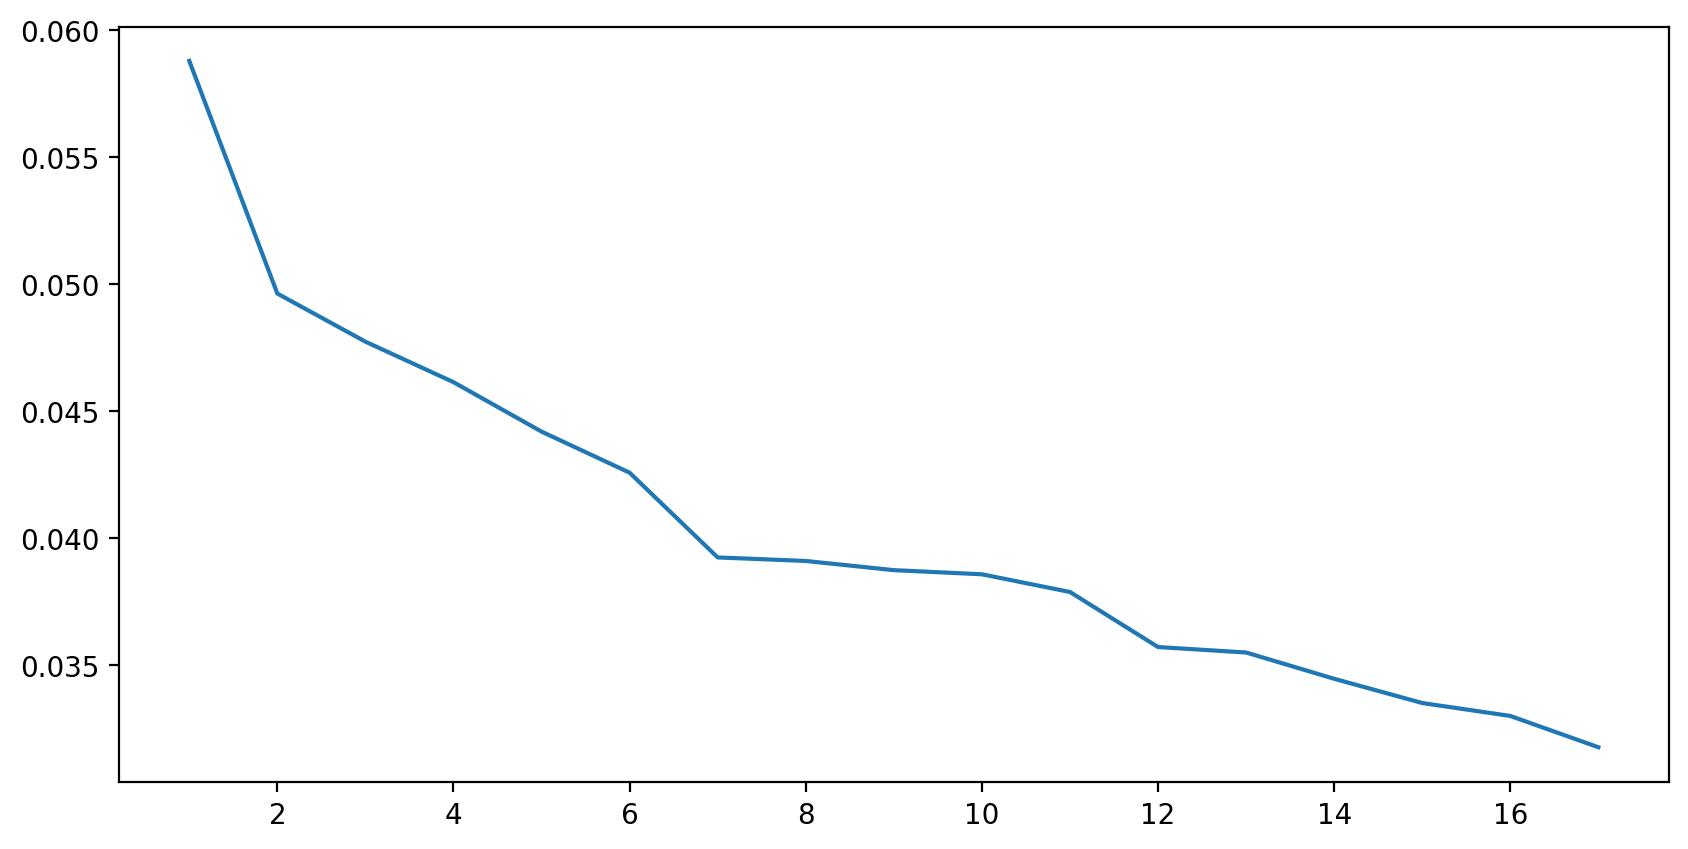

In [289]:
plt.figure(figsize=(10,5),dpi=200)
plt.plot(range(1,len(selected)+1),test_score)
#plt.savefig('逐步变量选择过程中测试集均方误差的变化.png')

In [ ]:
#最终选择的八个变量
selected

In [124]:
#均方误差的变化
test_score

[0.05892375653398016,
 0.05768750073170727,
 0.052097434390243384,
 0.04244170682926819,
 0.03819562658536527,
 0.031385631219512086,
 0.02839750195121933]

In [155]:
#找出变量的中文名
english_features=pd.read_excel('/Users/zhongrunping/Desktop/jupyter文件夹/数学建模/253个样本(已经预处理过).xlsx'
                  ,na_values='Nan')[::-1].iloc[:,2:][-1:].values[0]
chinese_features=pd.read_excel('/Users/zhongrunping/Desktop/jupyter文件夹/数学建模/253个样本(已经预处理过).xlsx'
                  ,na_values='Nan')[::-1].iloc[:,2:].columns

In [165]:
chinese_selected=[]
for i in selected:
    for m,n in enumerate(english_features):
        if i==n:
            chinese_selected.append(chinese_features[m])
            print(i,':',chinese_features[m])

辛烷值1RON : 辛烷值RON
S-ZORB.TE_5201.DACA : A-202A/B出口总管温度
S-ZORB.FT_9302.PV : 0.3MPa凝结水出装置流量
S-ZORB.TE_1102.DACA : E-101壳程入口总管温度
硫含量2,μg/g : 硫含量,μg/g.1
S-ZORB.FC_1203.PV : D121去稳定塔流量
S-ZORB.LC_3301.DACA : D123冷凝水罐液位


In [193]:
a=pd.read_excel('/Users/zhongrunping/Desktop/jupyter文件夹/数学建模/253个样本(已经预处理过).xlsx'
                  ,na_values='Nan')[::-1][:-1].iloc[:,:2]
result=pd.read_excel('/Users/zhongrunping/Desktop/jupyter文件夹/数学建模/253个样本(已经预处理过).xlsx'
                  ,na_values='Nan')[::-1][:-1][chinese_selected]

In [194]:
result.insert(0,'序号',a.iloc[:,0])
result.insert(1,'时间',a.iloc[:,1])

In [196]:
result.to_excel('325个样本数据(降维之后).xlsx',index=None)

In [223]:
data

,"硫含量1,μg/g",辛烷值1RON,"饱和烃,v%（烷烃+环烷烃）","烯烃,v%","芳烃,v%","溴值\n,gBr/100g","密度(20℃),\nkg/m³","硫含量2,μg/g",辛烷值2RON,"焦炭1,wt%",...,S-ZORB.CAL_1.CANGLIANG.PV,S-ZORB.FT_1006.DACA.PV,S-ZORB.FT_5204.DACA.PV,S-ZORB.FT_1006.TOTALIZERA.PV,S-ZORB.FT_5204.TOTALIZERA.PV,S-ZORB.FT_1503.DACA.PV,S-ZORB.FT_1503.TOTALIZERA.PV,S-ZORB.FT_1504.DACA.PV,S-ZORB.FT_1504.TOTALIZERA.PV,S-ZORB.PC_1001A.PV
0,0.224382,0.099307,-0.555423,0.904102,-0.569696,-0.517153,0.271646,1.000000,0.102994,0.574111,...,0.296683,0.545969,-0.011311,0.267879,0.683246,1.000000,-0.581038,-16.013789,-0.779532,-2.594958
1,0.224382,-0.150885,-0.555423,0.904102,-0.569696,-0.517153,0.271646,-0.059179,-0.165601,0.128155,...,0.704628,0.487119,-0.015885,0.274783,0.688485,0.905778,-0.579015,-14.485815,-0.773905,-2.579701
2,0.257799,-0.150885,-0.511595,0.636881,-0.098788,-0.119241,-0.130205,-0.110846,-0.201076,0.283125,...,0.521728,0.525320,-0.015595,0.281723,0.693669,0.811557,-0.576993,-12.957840,-0.768278,-2.564444
3,0.257799,-0.250962,-0.511595,0.636881,-0.098788,-0.119241,-0.130205,-0.110846,-0.251754,0.658843,...,0.381108,0.558000,-0.016289,0.292349,0.701123,0.670224,-0.573959,-10.665878,-0.759837,-2.541559
4,0.257799,-0.250962,-0.511595,0.636881,-0.098788,-0.119241,-0.130205,-0.110846,-0.201076,0.698979,...,0.919968,0.538099,-0.015417,0.299446,0.706243,0.576002,-0.571937,-9.137904,-0.754210,-2.526301
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320,-0.348098,-0.050808,-0.040412,0.138150,-0.198190,0.444792,-0.111069,-0.110846,-0.064245,-0.081445,...,-0.206622,0.264998,0.028971,0.243224,-0.249932,-0.016375,0.967293,-0.551006,0.974427,1.000000
321,-0.434278,0.349500,-0.035084,0.076579,-0.077702,0.444619,-0.113461,-0.110846,0.290504,-0.011207,...,-0.166599,0.256750,0.029885,0.248820,-0.241993,-0.016434,0.972654,-0.541647,0.977800,0.999877
322,-0.323475,0.499615,-0.035084,0.099668,-0.127906,0.468413,0.239354,-0.110846,0.442539,-0.083675,...,-0.223666,0.256463,0.027167,0.262657,-0.221935,-0.016466,0.984516,-0.504664,0.986544,0.999766
323,-0.372721,0.399538,-0.035084,0.108904,-0.147987,0.477930,0.380480,-0.110846,0.442539,-0.090364,...,-0.176629,0.234179,0.031956,0.268098,-0.213971,-0.016457,0.989412,-0.463586,0.990028,0.999894
